In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_csv('/content/visualizing_global_co2_data.csv')

READ FILE

In [4]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850,AFG,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,AFG,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.165,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,Afghanistan,1852,AFG,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Afghanistan,1853,AFG,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.164,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,Afghanistan,1854,AFG,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp', 'cement_co2',
       'cement_co2_per_capita', 'co2', 'co2_growth_abs', 'co2_growth_prct',
       'co2_including_luc', 'co2_including_luc_growth_abs',
       'co2_including_luc_growth_prct', 'co2_including_luc_per_capita',
       'co2_including_luc_per_gdp', 'co2_including_luc_per_unit_energy',
       'co2_per_capita', 'co2_per_gdp', 'co2_per_unit_energy', 'coal_co2',
       'coal_co2_per_capita', 'consumption_co2', 'consumption_co2_per_capita',
       'consumption_co2_per_gdp', 'cumulative_cement_co2', 'cumulative_co2',
       'cumulative_co2_including_luc', 'cumulative_coal_co2',
       'cumulative_flaring_co2', 'cumulative_gas_co2', 'cumulative_luc_co2',
       'cumulative_oil_co2', 'cumulative_other_co2', 'energy_per_capita',
       'energy_per_gdp', 'flaring_co2', 'flaring_co2_per_capita', 'gas_co2',
       'gas_co2_per_capita', 'ghg_excluding_lucf_per_capita', 'ghg_per_capita',
       'land_use_change_co2', 'land_use_chang

In [6]:
df.shape

(50598, 79)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50598 entries, 0 to 50597
Data columns (total 79 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50598 non-null  object 
 1   year                                       50598 non-null  int64  
 2   iso_code                                   42142 non-null  object 
 3   population                                 40008 non-null  float64
 4   gdp                                        14564 non-null  float64
 5   cement_co2                                 24974 non-null  float64
 6   cement_co2_per_capita                      22714 non-null  float64
 7   co2                                        31349 non-null  float64
 8   co2_growth_abs                             29010 non-null  float64
 9   co2_growth_prct                            25032 non-null  float64
 10  co2_including_luc     

In [9]:
df.isnull().sum()

country                            0
year                               0
iso_code                        8456
population                     10590
gdp                            36034
                               ...  
temperature_change_from_n2o    12978
total_ghg                      44449
total_ghg_excluding_lucf       44449
trade_co2                      46339
trade_co2_share                46340
Length: 79, dtype: int64

HANDLING NULL VALUES

In [15]:
num_cols=df.select_dtypes(include=np.number).columns.tolist()

In [14]:
num_cols

['year',
 'population',
 'gdp',
 'cement_co2',
 'cement_co2_per_capita',
 'co2',
 'co2_growth_abs',
 'co2_growth_prct',
 'co2_including_luc',
 'co2_including_luc_growth_abs',
 'co2_including_luc_growth_prct',
 'co2_including_luc_per_capita',
 'co2_including_luc_per_gdp',
 'co2_including_luc_per_unit_energy',
 'co2_per_capita',
 'co2_per_gdp',
 'co2_per_unit_energy',
 'coal_co2',
 'coal_co2_per_capita',
 'consumption_co2',
 'consumption_co2_per_capita',
 'consumption_co2_per_gdp',
 'cumulative_cement_co2',
 'cumulative_co2',
 'cumulative_co2_including_luc',
 'cumulative_coal_co2',
 'cumulative_flaring_co2',
 'cumulative_gas_co2',
 'cumulative_luc_co2',
 'cumulative_oil_co2',
 'cumulative_other_co2',
 'energy_per_capita',
 'energy_per_gdp',
 'flaring_co2',
 'flaring_co2_per_capita',
 'gas_co2',
 'gas_co2_per_capita',
 'ghg_excluding_lucf_per_capita',
 'ghg_per_capita',
 'land_use_change_co2',
 'land_use_change_co2_per_capita',
 'methane',
 'methane_per_capita',
 'nitrous_oxide',
 'nitrou

In [17]:
imputer= SimpleImputer(strategy='mean')
df[num_cols]=imputer.fit_transform(df[num_cols])

In [18]:
df.isnull().sum()

country                           0
year                              0
iso_code                       8456
population                        0
gdp                               0
                               ... 
temperature_change_from_n2o       0
total_ghg                         0
total_ghg_excluding_lucf          0
trade_co2                         0
trade_co2_share                   0
Length: 79, dtype: int64

In [19]:
df.dropna(inplace=True)

In [22]:
df.isnull().sum()

country                        0
year                           0
iso_code                       0
population                     0
gdp                            0
                              ..
temperature_change_from_n2o    0
total_ghg                      0
total_ghg_excluding_lucf       0
trade_co2                      0
trade_co2_share                0
Length: 79, dtype: int64

In [23]:
df.head(3)

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1850.0,AFG,3752993.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,2.190116,0.002956,0.006886,0.010069,0.000497,771.485168,748.578502,-7.518768,20.623119
1,Afghanistan,1851.0,AFG,3767956.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,0.165000,0.000000,0.000000,0.000000,0.000000,771.485168,748.578502,-7.518768,20.623119
2,Afghanistan,1852.0,AFG,3783940.0,2.677586e+11,8.392491,0.063958,380.237549,5.703529,20.492413,...,20.6743,0.164000,0.000000,0.000000,0.000000,0.000000,771.485168,748.578502,-7.518768,20.623119


EDA ANALYSIS

1. How have global emissions of carbon dioxide (CO2) changed over time?

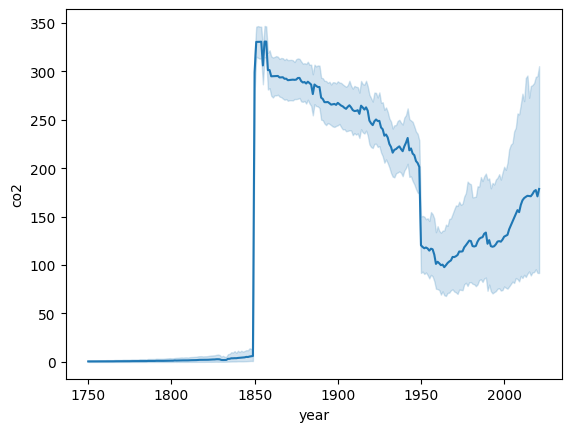

In [24]:
sns.lineplot(x='year',y='co2',data=df)
plt.show()

2. Who emits the most CO2 each year?

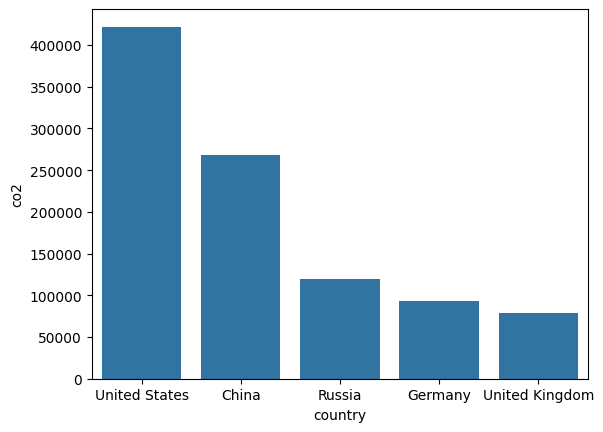

In [28]:
df1=df.groupby('country')['co2'].sum().reset_index().sort_values(by='co2',ascending=False).head(5)
sns.barplot(x='country',y='co2',data=df1)
plt.show()

3. Where in the world does the average person emit the most carbon dioxide (CO2) each year?

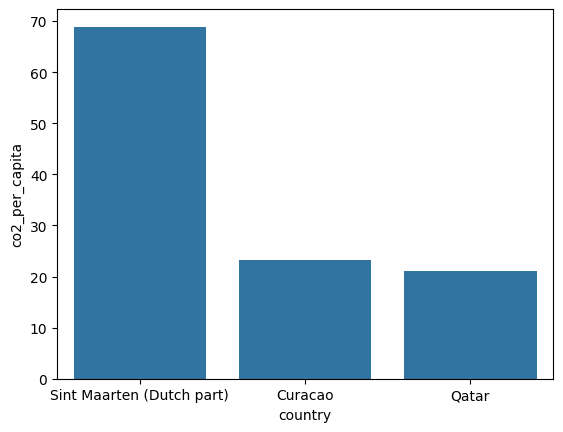

In [42]:
# prompt:

df2=df.groupby('country')['co2_per_capita'].mean().reset_index().sort_values(by='co2_per_capita',ascending=False).head(3)
sns.barplot(x='country',y='co2_per_capita',data=df2)
plt.show()
